In [72]:
import pandas as pd
import os
import numpy as np
import re 
import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.set_option('display.max_rows', 201) # показывать больше строк
pd.set_option('display.max_columns', 15) # показывать больше колонок

Data = pd.read_csv('d:/SkillFactory/module_3/main_task_new.csv')

In [73]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [74]:
# переименуем колонки
Data.columns = ['Restaurant_id', 'City', 'Cuisine_Style', 'Ranking', 'Rating',
                'Price_Range', 'Number_of_Reviews', 'Reviews', 'URL_TA', 'ID_TA']

##### Создадим колонки с пропусками

In [75]:
Data['Cuisine_Style_isNaN'] = pd.isna(Data['Cuisine_Style']).astype('uint8')
Data['Price_Range_isNaN'] = pd.isna(Data['Price_Range']).astype('uint8')
Data['Number_of_Reviews_isNaN'] = pd.isna(Data['Number_of_Reviews']).astype('uint8')

In [76]:
# Data

## 1.1 Преобразуем колонку Cuisine_Style. Добавим новый признак
(Добавим колонку с количеством кухонь в ресторане. Оставляем кухни: страна, регион, тип кухни)

In [77]:
Data.Cuisine_Style = Data.Cuisine_Style.fillna('mixed')  # заполняем пропуски 
# Data.Cuisine_Style

In [78]:
Cuisine_S = ['Italian', 'French', 'Spanish', 'Portuguese', 'Japanese', 'British', 'Czech', 'Chinese', 'American',
             'Thai', 'Polish', 'Austrian', 'Greek', 'Indian', 'Hungarian', 'Vietnamese', 'Lebanese', 'German', 
             'Belgian', 'Korean', 'Moroccan', 'Dutch', 'Irish', 'Peruvian', 'Swiss', 'Brazilian', 'Swedish', 
             'Danish', 'Mexican', 'Indonesian', 'Ethiopian', 'Turkish', 'Argentinean', 'Russian', 'Caribbean',
             'Slovenian', 'Norwegian', 'Croatian','mixed', 'Cambodian', 'Taiwanese', 'Tibetan', 'Filipino', 
             'Cafe', 'Pizza', 'Mediterranean', 'Bar', 'Vegetarian', 'Fast Food', 'European', 'Pub', 'Asian',
             'Seafood', 'Sushi', 'Wine Bar', 'African', 'International', 'Contemporary', 'Steakhouse', 'Delicatessen',
             'Healthy', 'Middle Eastern', 'Fusion', 'Grill', 'Street Food', 'Vegan Options', 'Venezuelan', 'Colombian',
             'Pakistani', 'Halal']

# Data.Cuisine_Style.value_counts().sort_values(ascending=False).head(200)

In [79]:
def clean(x):          # функция сортирующая кухни
    for i in Cuisine_S:
        if i in x:
            return i
        else:
            continue
    return x


def clean_name(str_val):  # чистим колонку от лишнего
    str_val = str_val.strip('[]')
    str_val = str_val.strip("''")
    str_val = str_val.strip('[]')
    return str_val

In [80]:
Data['Cuisine_most'] = Data.Cuisine_Style.apply(clean)
Data.Cuisine_most = Data.Cuisine_most.apply(clean_name)
Data.Cuisine_most = Data.Cuisine_most.astype('object')
# Data.Cuisine_most.value_counts().sort_values(ascending=False).head(200)

## 1.2 Преобразуем колонку Ranking.
(меняем на целочисленный тип)

In [81]:
Data.Ranking = Data.Ranking.astype('Int64')
# Data.Ranking.value_counts().sort_values(ascending=False).head(200)

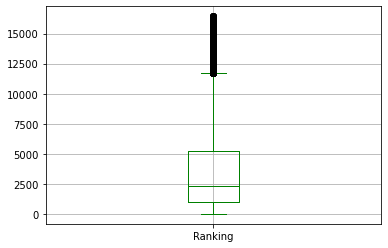

In [82]:
boxplot = Data.boxplot(column=['Ranking'], color='green')

(array([15820.,  8789.,  4567.,  3625.,  2143.,  1382.,  1104.,  1131.,
          868.,   571.]),
 array([1.0, 1645.3, 3289.6, 4933.9, 6578.2, 8222.5, 9866.8, 11511.1,
        13155.4, 14799.699999999999, 16444.0], dtype=object),
 <BarContainer object of 10 artists>)

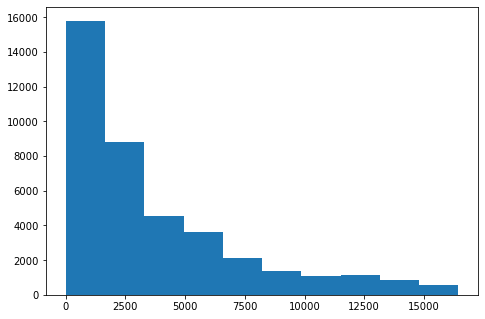

In [83]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(Data['Ranking'])

## 1.3 Преобразуем колонку Rating.
(тип float, пропусков нет)

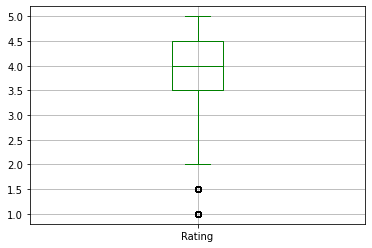

In [84]:
boxplot = Data.boxplot(column=['Rating'], color='green')

(array([  201.,   139.,   466.,   915.,     0.,  2955.,  6824., 13692.,
        10929.,  3879.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

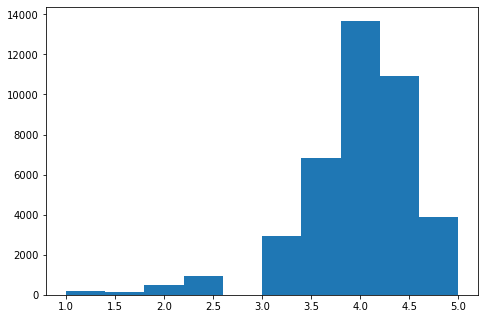

In [85]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(Data['Rating'])

## 1.4 Преобразуем колонку Price_Range.
(преобразуем в катигорию, заполняем пропуски)

In [86]:
Data.Price_Range.value_counts().sort_values(ascending=False).head(200)

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price_Range, dtype: int64

In [87]:
def Price_R(Price):
    if Price == '$$ - $$$':
        return 2
    if Price == '$':
        return 1  
    if Price == '$$$$':
        return 3
    else:
        return Price

In [88]:
Data.Price_Range = Data.Price_Range.apply(Price_R)
Data.Price_Range = Data.Price_Range.astype('Int64')
Data.Price_Range.value_counts().sort_values(ascending=False).head(4)

2    18412
1     6279
3     1423
Name: Price_Range, dtype: Int64

In [89]:
Data.Price_Range = Data.Price_Range.fillna(2)  # заполняем пропуски модой
Data.Price_Range = Data.Price_Range
Data.Price_Range.value_counts().sort_values(ascending=False).head(4)

2    32298
1     6279
3     1423
Name: Price_Range, dtype: Int64

## 1.5 Преобразуем колонку Number_of_Reviews.
(преобразуем в целочисленный тип, заполняем пропуски значением ноль)

In [90]:
Data.Number_of_Reviews = Data.Number_of_Reviews.astype('Int64')
Data.Number_of_Reviews = Data.Number_of_Reviews.fillna(0)

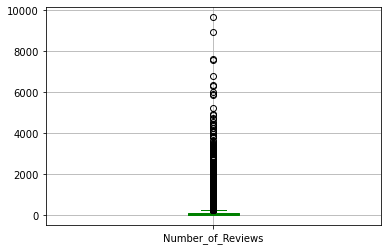

In [91]:
boxplot = Data.boxplot(column=['Number_of_Reviews'], color='green')

(array([3.9298e+04, 5.5000e+02, 9.3000e+01, 3.2000e+01, 1.4000e+01,
        3.0000e+00, 5.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([0.0, 966.0, 1932.0, 2898.0, 3864.0, 4830.0, 5796.0, 6762.0, 7728.0,
        8694.0, 9660.0], dtype=object),
 <BarContainer object of 10 artists>)

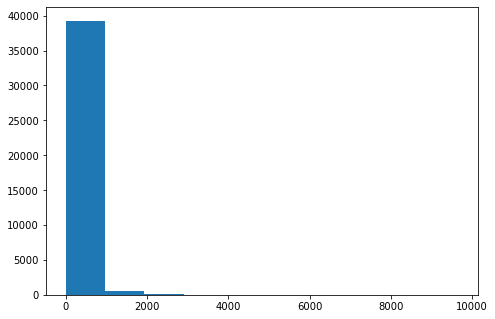

In [92]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(Data['Number_of_Reviews'])

## 1.6 Преобразуем колонку Reviews.
(удаляем отзывы, разделяем даты на две колонки)

In [93]:
def review_date1(row):
    date_regex=r'\b(0[1-9]|1[012])[- /.](0[1-9]|[12][0-9]|3[01])[- /.](19|20\d\d)\b'
    b = re.findall(date_regex, row)
    return ['/'.join(map(str, x)) for x in b ] 

def review_len(row):    #    проверяем на пропуски 
    if len(row) < 2:
        return 'NaN'
    else:
        return row
     
Data['Dates_of_Reviews'] = Data['Reviews'].apply(review_date1)
Data['Dates_of_Reviews'] = Data['Dates_of_Reviews'].apply(review_len)
# Data['Dates_of_Reviews'] 

In [94]:
# разделяем даты на два столбца

def D1(row):
    if len(row[0]) != 10:    # проверяем нет ли некорректных дат
        return "NaN"
    else:
        return row[0]

def D2(row):
    if len(row[1]) != 10:
        return "NaN"
    else:
        return row[1]
    
Data['Dates_of_Reviews1'] = Data['Dates_of_Reviews'].apply(D1)  
Data['Dates_of_Reviews2'] = Data['Dates_of_Reviews'].apply(D2)  

In [95]:
Data["Dates_of_Reviews1"] = pd.to_datetime(Data["Dates_of_Reviews1"], format="%m/%d/%Y")
Data["Dates_of_Reviews2"] = pd.to_datetime(Data["Dates_of_Reviews2"], format="%m/%d/%Y")

In [96]:
#Data.info()

## 2.1 Kонструирование признаков
### Из колонки Restaurant_id создадим колонку с количеством ресторанов в сети

In [97]:
Rest_nets = Data.Restaurant_id.value_counts()    # количество ресторанов в сети


def Res_id(id):
    return Rest_nets[id]

Data['counts_restaurants'] = Data['Restaurant_id'].apply(Res_id)     

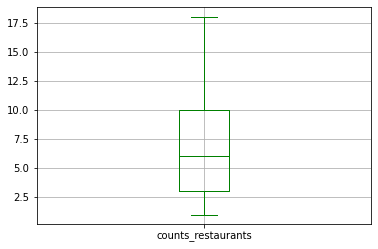

In [98]:
boxplot = Data.boxplot(column=['counts_restaurants'], color='green')

(array([9339., 6926., 5048., 2688., 5476., 4981., 1812., 2713.,  843.,
         174.]),
 array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ]),
 <BarContainer object of 10 artists>)

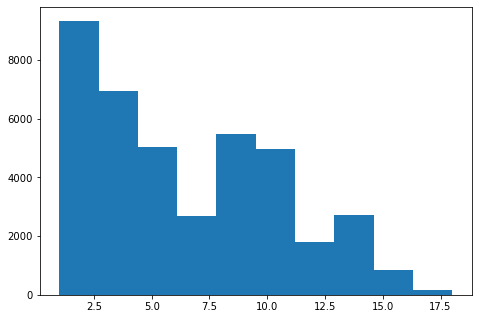

In [99]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(Data['counts_restaurants'])

## 2.2 Kонструирование признаков
### Из колонки City создадим колонку с количеством всех ресторанов в городе

In [100]:
City_Rest_count = Data.City.value_counts()


def Res_in_City(City):
    return City_Rest_count[City]   


Data['counts_rest_inCity'] = Data['City']. apply(Res_in_City)  

## 2.3 Kонструирование признаков
### Из колонок Dates_of_Reviews1 и Dates_of_Reviews2  создадим период между отзывами

In [101]:
Data["Dates_of_Reviews3"] = (Data["Dates_of_Reviews1"] - Data["Dates_of_Reviews2"]).dt.days
Data.Dates_of_Reviews3 = Data.Dates_of_Reviews3.fillna(1)  # заполняем пропуски 
Data.Dates_of_Reviews3 = Data.Dates_of_Reviews3.astype('Int64')

## 2.4 Kонструирование признаков
### Считаем количество кухонь в рестране

In [102]:
def num_Cuis(Cus):
    return Cus.count(",") + 1


Data.Cuisine_Style.apply(clean_name)  # чистим от скобок и []

Data['Cuisine_num'] = Data.Cuisine_Style.apply(num_Cuis)

### Смотрим корреляции

<AxesSubplot:>

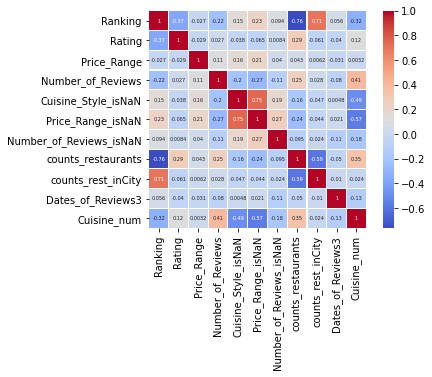

In [103]:
Data_corr = Data.copy()
Data_corr = Data_corr.drop(['Restaurant_id', 'Cuisine_Style', 'Reviews', 
                                         'URL_TA', 'ID_TA', 'Dates_of_Reviews',
                                         'Dates_of_Reviews1', 'Dates_of_Reviews2'], axis = 1)
correlation = Data_corr.corr()

sns.heatmap(correlation, vmin=correlation.values.min(), vmax=1, square=True, cmap="coolwarm", linewidths=0.1, annot=True, annot_kws={"fontsize":5})

## 2.5 Kонструирование признаков
### Создадим dummy variables

In [104]:
Data = pd.get_dummies(Data, columns=['City'], dummy_na=True)
Data = pd.get_dummies(Data, columns=['Cuisine_most'], dummy_na=True)

### Создаем копию датасета 

In [105]:
Data_experiment = Data.copy()

In [106]:
Data_experiment_1 = Data_experiment.drop(['Restaurant_id', 'Cuisine_Style', 'Reviews',
                                          'URL_TA', 'ID_TA', 'Dates_of_Reviews',
                                          'Dates_of_Reviews1', 'Dates_of_Reviews2'], axis=1)
Data_experiment_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 131 entries, Ranking to Cuisine_most_nan
dtypes: Int64(4), float64(1), int64(3), uint8(123)
memory usage: 7.3 MB


## 1.1 Тестирование

### Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
 

In [107]:
X = Data_experiment_1.drop(['Rating'], axis = 1)  
y = Data_experiment_1['Rating'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train) 
y_pred = regr.predict(X_test) 

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20895299999999997


In [ ]:
# plt.rcParams['figure.figsize'] = (15, 5)
# feat_importance = pd.Serias(regr.feature_importances_, index=X.columns)
# feat_importance.nlargest(10).plot(kind='bar')